# FODO Lattice
The following parameters are needed to create a FODO lattice:

```py
Name                      # Name of the element
DriftLength               # Length of the drift tubes
QuadrupoleMagnetLength    # Length of the quadrupole magnets
QuadrupoleMagnetStrength  # Strength of the quadrupole magnets
```

The FODO object is generated from the **FODO** class of the **BeamLine** module as follows:
```py
Beamline(Name, DriftLength, QuadrupoleMagnetLength, QuadrupoleMagnetStrength)
```
**If step size is used for FODO:** step size should be the exact divisor of half of the quadrupole magnet length and the drift tube length.

In [1]:
import sys
sys.path.append('../') # to make the module directory the default directory:

import apricotbl.Beamline as bl # to define FODO objects
import apricotbl.Functions as fn # for beam transporting
import apricotbl.Graphs as gp # to plot graphs

In [2]:
# Createing a FODO Lattice with 2.5 m drift tube and 0.5 m quadrupole magnet (strength = 0.54102)
lattice = bl.FODO("FODO",2.5,0.5,0.54102)
beamline = bl.Beamline( "beamline", [lattice] )

In [3]:
# Generating of a beam compatible with FODO lattice
ParticleTpye = "electron"   # particle
NumberOfParticles = 10000   # number of particle
BeamEnergy = 250e3          # beam energy keV
x_rms = 0.003               # sigma_x    m  
y_rms = 0.003               # sigma_y    m

Beam = lattice.RandomBeam( ParticleTpye, NumberOfParticles, BeamEnergy, x_rms, y_rms )


Creating beam with parameters below:
        
    Particle Type           : electron
    Number of Particles     : 10000
    Beam Energy (KeV)       : 2.500e+02
    RMS x size (mm)         : 3.000e-06
    RMS y size (mm)         : 3.000e-06
    RMS z size (mm)         : 0.000e+00
    Emittance x (m.rad)     : 7.752e-10
    Emittance y (m.rad)     : 1.699e-09
    Alpha x                 : -7.853e-17
    Alpha y                 : -7.853e-17
    %Energy Spread          : 0.000e+00



In [4]:
# Running beam on beamline
fn.TransportBeam( Beam, beamline.Elements, 0.05 )

Progress:  >----------------------------------------⬮> 100.0% 


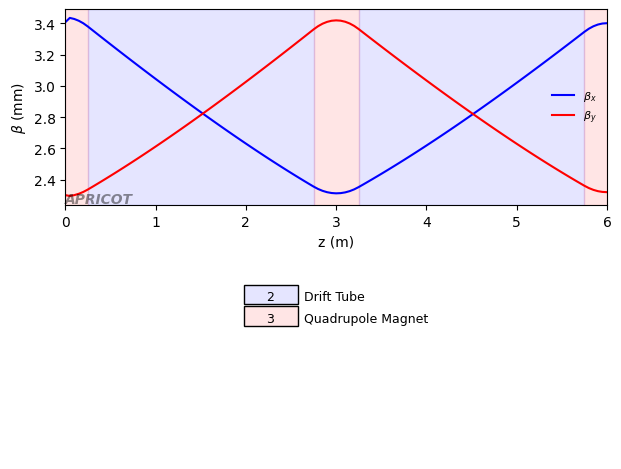

In [5]:
# Plotting Beta Function
gp.plotBetaFunctions( Beam, beamline.Elements )